# DATA PROCESSING: Lee Jedidiah
-----------
## Inspiration: 
The S&P 500 is widely regarded as the benchmark for equity investing, especially among beginner and passive investors.  
Yet, most investors have limited visibility into:

- **What** they are investing in  
- **Which companies** actually move the index  
- **Which sectors** drive gains and losses  
- **Why** the index rises or falls on any given day  

This curiosity drives the central question behind this project.

## Problem Statement: 
**Which companies and sectors contributed most to the S&P 500’s performance during the first half of 2025, and how did volatility and trading activity influence these movements?**

## Notebook Structure
### **1️: Data Cleaning**  
- Standardize column names  
- Ensure consistent data types  
- Validate missing values

### **2️: Exploratory Data Analysis (EDA)**  
- Sector distribution of companies  
- Feature engineering (returns, volatility, dollar volume)  
- Initial visualizations  

### **3️: Company-Level Insights**
- Identify top contributors to S&P 500 performance  
- Compute weighted contribution (return × liquidity)  
- Examine risk–return dynamics  

### **4️: Regression Analysis**  
- Linear regression on cumulative returns  
- Features: volatility, liquidity, sector  
- Evaluate model performance and interpret coefficients  

### **5️: Sector-Level Insights**  
- Aggregate contribution by GICS sector  
- Compare sector performance and volatility  
- Understand broad market drivers  

### **6️: Conclusion & Implications**  
- Summarize key findings  
- Connect results to broader market themes (AI, macro trends, sentiment)  
- Highlight limitations and potential extensions  





## Section 1: Setting up libraries and cleaning data 

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [3]:
# Import the necessary file 
df = pd.read_csv('sp500_2025_h1.csv')
df.head(5)

,company_name,ticker,02-01-2025_opening,02-01-2025_closing,02-01-2025_volume,03-01-2025_opening,03-01-2025_closing,03-01-2025_volume,06-01-2025_opening,06-01-2025_closing,...,25-06-2025_volume,26-06-2025_opening,26-06-2025_closing,26-06-2025_volume,27-06-2025_opening,27-06-2025_closing,27-06-2025_volume,30-06-2025_opening,30-06-2025_closing,30-06-2025_volume
0,Nvidia,NVDA,136.000,138.310,198247166,140.010,144.470,229322478,148.590,149.430,...,269146471,155.975,155.02,198145746,156.040,157.75,263234539,158.40,157.99,194580316
1,Microsoft,MSFT,425.530,418.580,16896469,421.080,423.350,16662943,428.000,427.850,...,17495099,492.980,497.45,21578853,497.550,495.94,34539236,497.04,497.41,28368991
2,Apple Inc.,AAPL,248.657,243.582,55802016,243.093,243.093,40288361,244.042,244.731,...,39525730,201.430,201.00,50799121,201.890,201.08,73188571,202.01,205.17,91912816
3,Amazon,AMZN,222.030,220.220,33956579,222.505,224.190,27515606,226.780,227.610,...,31755698,213.120,217.12,50480814,219.920,223.30,119217138,223.52,219.39,58887780
4,Meta Platforms,META,589.720,599.240,12682269,604.760,604.630,11436784,611.825,630.200,...,9320436,714.355,726.09,13964793,726.515,733.63,18775735,744.55,738.09,15402105


In [4]:
df.info

<bound method DataFrame.info of                  company_name ticker  02-01-2025_opening  02-01-2025_closing  \
0                      Nvidia   NVDA             136.000             138.310   
1                   Microsoft   MSFT             425.530             418.580   
2                  Apple Inc.   AAPL             248.657             243.582   
3                      Amazon   AMZN             222.030             220.220   
4              Meta Platforms   META             589.720             599.240   
..                        ...    ...                 ...                 ...   
498              Henry Schein   HSIC              69.680              68.550   
499           LKQ Corporation    LKQ              36.810              36.240   
500  Eastman Chemical Company    EMN              91.660              88.520   
501                    CarMax    KMX              81.920              81.220   
502       News Corp (Class B)    NWS              30.660              30.370   

     02

In [5]:
df.describe

<bound method NDFrame.describe of                  company_name ticker  02-01-2025_opening  02-01-2025_closing  \
0                      Nvidia   NVDA             136.000             138.310   
1                   Microsoft   MSFT             425.530             418.580   
2                  Apple Inc.   AAPL             248.657             243.582   
3                      Amazon   AMZN             222.030             220.220   
4              Meta Platforms   META             589.720             599.240   
..                        ...    ...                 ...                 ...   
498              Henry Schein   HSIC              69.680              68.550   
499           LKQ Corporation    LKQ              36.810              36.240   
500  Eastman Chemical Company    EMN              91.660              88.520   
501                    CarMax    KMX              81.920              81.220   
502       News Corp (Class B)    NWS              30.660              30.370   

     

In [6]:
df.shape

(503, 368)

In [7]:
df.head(100)

,company_name,ticker,02-01-2025_opening,02-01-2025_closing,02-01-2025_volume,03-01-2025_opening,03-01-2025_closing,03-01-2025_volume,06-01-2025_opening,06-01-2025_closing,...,25-06-2025_volume,26-06-2025_opening,26-06-2025_closing,26-06-2025_volume,27-06-2025_opening,27-06-2025_closing,27-06-2025_volume,30-06-2025_opening,30-06-2025_closing,30-06-2025_volume
0,Nvidia,NVDA,136.000,138.310,198247166,140.010,144.470,229322478,148.590,149.430,...,269146471,155.975,155.02,198145746,156.040,157.750,263234539,158.400,157.99,194580316
1,Microsoft,MSFT,425.530,418.580,16896469,421.080,423.350,16662943,428.000,427.850,...,17495099,492.980,497.45,21578853,497.550,495.940,34539236,497.040,497.41,28368991
2,Apple Inc.,AAPL,248.657,243.582,55802016,243.093,243.093,40288361,244.042,244.731,...,39525730,201.430,201.00,50799121,201.890,201.080,73188571,202.010,205.17,91912816
3,Amazon,AMZN,222.030,220.220,33956579,222.505,224.190,27515606,226.780,227.610,...,31755698,213.120,217.12,50480814,219.920,223.300,119217138,223.520,219.39,58887780
4,Meta Platforms,META,589.720,599.240,12682269,604.760,604.630,11436784,611.825,630.200,...,9320436,714.355,726.09,13964793,726.515,733.630,18775735,744.550,738.09,15402105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Automatic Data Processing,ADP,293.830,289.650,1025445,290.730,291.690,1044195,289.150,287.130,...,2355101,299.240,302.98,2304170,302.940,303.450,1931132,303.370,308.40,2414776
96,DoorDash,DASH,168.790,170.650,2314342,172.600,174.960,1926351,175.000,175.020,...,3070348,232.650,239.64,3202390,239.705,242.315,7324620,244.300,246.51,8089915
97,Analog Devices,ADI,215.490,211.350,2379261,212.760,215.370,2547489,215.330,218.000,...,3548885,236.030,237.30,3057975,237.000,236.960,3617766,237.540,238.02,3258867
98,KKR,KKR,148.920,149.190,1665828,150.580,152.030,1687680,153.710,150.740,...,3872724,129.300,131.94,3916088,132.640,134.290,5399495,136.030,133.03,4035994


In [8]:
#  Create 3 Seperate Dataframes for opening, closing and volume 
# Keep company name and ticker 
initial_cols = ['company_name','ticker']
df_open = pd.concat([df[initial_cols],df.filter(regex = 'opening$', axis = 1)],axis = 1)
df_close = pd.concat([df[initial_cols],df.filter(regex = 'closing$', axis = 1)],axis = 1)
df_volume = pd.concat([df[initial_cols],df.filter(regex = 'volume$', axis = 1)],axis = 1)
df_close


,company_name,ticker,02-01-2025_closing,03-01-2025_closing,06-01-2025_closing,07-01-2025_closing,08-01-2025_closing,10-01-2025_closing,13-01-2025_closing,14-01-2025_closing,...,16-06-2025_closing,17-06-2025_closing,18-06-2025_closing,20-06-2025_closing,23-06-2025_closing,24-06-2025_closing,25-06-2025_closing,26-06-2025_closing,27-06-2025_closing,30-06-2025_closing
0,Nvidia,NVDA,138.310,144.470,149.430,140.140,140.110,135.91,133.230,131.760,...,144.69,144.12,145.48,143.85,144.17,147.90,154.31,155.02,157.75,157.99
1,Microsoft,MSFT,418.580,423.350,427.850,422.370,424.560,418.95,417.190,415.670,...,479.14,478.04,480.24,477.40,486.00,490.11,492.27,497.45,495.94,497.41
2,Apple Inc.,AAPL,243.582,243.093,244.731,241.944,242.433,236.59,234.143,233.024,...,198.42,195.64,196.58,201.00,201.50,200.30,201.56,201.00,201.08,205.17
3,Amazon,AMZN,220.220,224.190,227.610,222.110,222.130,218.94,218.460,217.760,...,216.10,214.82,212.52,209.69,208.47,212.77,211.99,217.12,223.30,219.39
4,Meta Platforms,META,599.240,604.630,630.200,617.890,610.720,615.86,608.330,594.250,...,702.12,697.23,695.77,682.35,698.53,712.20,708.68,726.09,733.63,738.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,Henry Schein,HSIC,68.550,69.090,71.760,71.670,71.060,69.67,70.700,71.270,...,70.76,70.16,71.13,71.98,71.89,72.68,72.79,73.15,73.27,73.05
499,LKQ Corporation,LKQ,36.240,36.590,36.760,36.490,36.340,36.27,36.490,37.290,...,38.04,37.15,36.86,37.13,37.36,37.65,36.94,37.07,37.12,37.01
500,Eastman Chemical Company,EMN,88.520,88.670,88.650,88.480,88.180,87.24,89.120,91.970,...,77.04,75.17,74.71,74.25,75.01,76.46,75.87,76.15,76.21,74.66
501,CarMax,KMX,81.220,80.070,79.750,79.120,81.930,78.34,78.500,79.570,...,65.85,64.43,64.33,68.57,67.17,69.21,67.50,66.67,66.60,67.21


## Import in the companies sectors 
For this section, we will require to do some web scraping as there are 503 companies and hence creating a map/dataframe for this will be too tedious 

In [9]:
sector_info = pd.read_csv('constituents.csv')
sector_info.head()

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989


In [10]:
sector_info = sector_info[['Symbol','Security','GICS Sector','GICS Sub-Industry']]
sector_info.rename(columns ={'Symbol':'ticker','Security':'company_name'}, inplace = True)
sector_info

,ticker,company_name,GICS Sector,GICS Sub-Industry
0,MMM,3M,Industrials,Industrial Conglomerates
1,AOS,A. O. Smith,Industrials,Building Products
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment
3,ABBV,AbbVie,Health Care,Biotechnology
4,ACN,Accenture,Information Technology,IT Consulting & Other Services
...,...,...,...,...
498,XYL,Xylem Inc.,Industrials,Industrial Machinery & Supplies & Components
499,YUM,Yum! Brands,Consumer Discretionary,Restaurants
500,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments
501,ZBH,Zimmer Biomet,Health Care,Health Care Equipment


In [11]:
def merge_sector(df_input):
    df_input = df_input.merge(sector_info, on =['company_name','ticker'], how='left')
    return df_input
df_open = merge_sector(df_open)
df_close = merge_sector(df_close)
df_volume = merge_sector(df_volume)

In [12]:
df_open.columns = df_open.columns.str.replace('_opening', '', regex=False)
df_close.columns = df_close.columns.str.replace('_closing', '', regex=False)
df_volume.columns = df_volume.columns.str.replace('_volume', '', regex=False)

In [13]:
df_close

,company_name,ticker,02-01-2025,03-01-2025,06-01-2025,07-01-2025,08-01-2025,10-01-2025,13-01-2025,14-01-2025,...,18-06-2025,20-06-2025,23-06-2025,24-06-2025,25-06-2025,26-06-2025,27-06-2025,30-06-2025,GICS Sector,GICS Sub-Industry
0,Nvidia,NVDA,138.310,144.470,149.430,140.140,140.110,135.91,133.230,131.760,...,145.48,143.85,144.17,147.90,154.31,155.02,157.75,157.99,Information Technology,Semiconductors
1,Microsoft,MSFT,418.580,423.350,427.850,422.370,424.560,418.95,417.190,415.670,...,480.24,477.40,486.00,490.11,492.27,497.45,495.94,497.41,Information Technology,Systems Software
2,Apple Inc.,AAPL,243.582,243.093,244.731,241.944,242.433,236.59,234.143,233.024,...,196.58,201.00,201.50,200.30,201.56,201.00,201.08,205.17,Information Technology,"Technology Hardware, Storage & Peripherals"
3,Amazon,AMZN,220.220,224.190,227.610,222.110,222.130,218.94,218.460,217.760,...,212.52,209.69,208.47,212.77,211.99,217.12,223.30,219.39,Consumer Discretionary,Broadline Retail
4,Meta Platforms,META,599.240,604.630,630.200,617.890,610.720,615.86,608.330,594.250,...,695.77,682.35,698.53,712.20,708.68,726.09,733.63,738.09,Communication Services,Interactive Media & Services
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,Henry Schein,HSIC,68.550,69.090,71.760,71.670,71.060,69.67,70.700,71.270,...,71.13,71.98,71.89,72.68,72.79,73.15,73.27,73.05,Health Care,Health Care Distributors
499,LKQ Corporation,LKQ,36.240,36.590,36.760,36.490,36.340,36.27,36.490,37.290,...,36.86,37.13,37.36,37.65,36.94,37.07,37.12,37.01,Consumer Discretionary,Distributors
500,Eastman Chemical Company,EMN,88.520,88.670,88.650,88.480,88.180,87.24,89.120,91.970,...,74.71,74.25,75.01,76.46,75.87,76.15,76.21,74.66,Materials,Specialty Chemicals
501,CarMax,KMX,81.220,80.070,79.750,79.120,81.930,78.34,78.500,79.570,...,64.33,68.57,67.17,69.21,67.50,66.67,66.60,67.21,Consumer Discretionary,Automotive Retail


In [14]:
# Convert to long format for easier analysis 
init_cols = ['company_name','ticker','GICS Sector','GICS Sub-Industry']

df_open_long = df_open.melt(
    id_vars = init_cols,
    var_name= 'date', 
    value_name = 'opening'
)
df_close_long = df_close.melt(
    id_vars = init_cols,
    var_name= 'date', 
    value_name = 'closing'
)
df_volume_long = df_volume.melt(
    id_vars = init_cols,
    var_name= 'date', 
    value_name = 'volume'
)

# Merge all 3 dataframes 
df_daily = df_open_long.merge(df_close_long, on = init_cols + ['date'],how='left').merge(df_volume_long, on = init_cols + ['date'], how = 'left')


In [15]:
df_daily['date'] = pd.to_datetime(df_daily['date'], format='%d-%m-%Y')
df_daily

,company_name,ticker,GICS Sector,GICS Sub-Industry,date,opening,closing,volume
0,Nvidia,NVDA,Information Technology,Semiconductors,2025-01-02,136.000,138.310,198247166
1,Microsoft,MSFT,Information Technology,Systems Software,2025-01-02,425.530,418.580,16896469
2,Apple Inc.,AAPL,Information Technology,"Technology Hardware, Storage & Peripherals",2025-01-02,248.657,243.582,55802016
3,Amazon,AMZN,Consumer Discretionary,Broadline Retail,2025-01-02,222.030,220.220,33956579
4,Meta Platforms,META,Communication Services,Interactive Media & Services,2025-01-02,589.720,599.240,12682269
...,...,...,...,...,...,...,...,...
61361,Henry Schein,HSIC,Health Care,Health Care Distributors,2025-06-30,73.460,73.050,1467368
61362,LKQ Corporation,LKQ,Consumer Discretionary,Distributors,2025-06-30,37.120,37.010,1624618
61363,Eastman Chemical Company,EMN,Materials,Specialty Chemicals,2025-06-30,75.850,74.660,4142418
61364,CarMax,KMX,Consumer Discretionary,Automotive Retail,2025-06-30,66.730,67.210,3178445


### With our data as a long table format, we can now use this as our master data table for feature engineering and data manipulation 

#### In this section, we will be feature engineering 2 key metrics 
- Daily Returns: This captures the percentage change in price from the market open to close, and allows us to compare stocks of different price points.  
- Dollar Volume: This represents the total dollar volume exchanged in a day, acting as a proxy for liquidity and market interest

Through this, these 2 metrics would set the foundation for further analytics and identify which company's movement actually matters in driving the S&P500

In [16]:
df_daily = df_daily.sort_values(['ticker','date']).reset_index(drop=True)
# Compute daily returns and dollar volumes
df_daily['daily_returns'] = (df_daily['closing'] - df_daily['opening'])/df_daily['opening']
df_daily['dollar_volume'] = df_daily['closing'] * df_daily['volume']
df_daily.head()

,company_name,ticker,GICS Sector,GICS Sub-Industry,date,opening,closing,volume,daily_returns,dollar_volume
0,Agilent Technologies,A,Health Care,Life Sciences Tools & Services,2025-01-02,134.900,133.43,953587,-0.010897,1.272371e+08
1,Agilent Technologies,A,Health Care,Life Sciences Tools & Services,2025-01-03,133.525,135.69,1246919,0.016214,1.691944e+08
2,Agilent Technologies,A,Health Care,Life Sciences Tools & Services,2025-01-06,135.340,136.43,1047034,0.008054,1.428468e+08
3,Agilent Technologies,A,Health Care,Life Sciences Tools & Services,2025-01-07,135.980,137.41,1056693,0.010516,1.452002e+08
4,Agilent Technologies,A,Health Care,Life Sciences Tools & Services,2025-01-08,137.220,137.00,1684573,-0.001603,2.307865e+08


### Distribution of Sectors
Before we begin feature engineering, we need to understand the hihg level distribution of what sectors make up the S&P500, and how many companies represent each sector

C:\Users\2323p\AppData\Local\Temp\ipykernel_49036\652510570.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


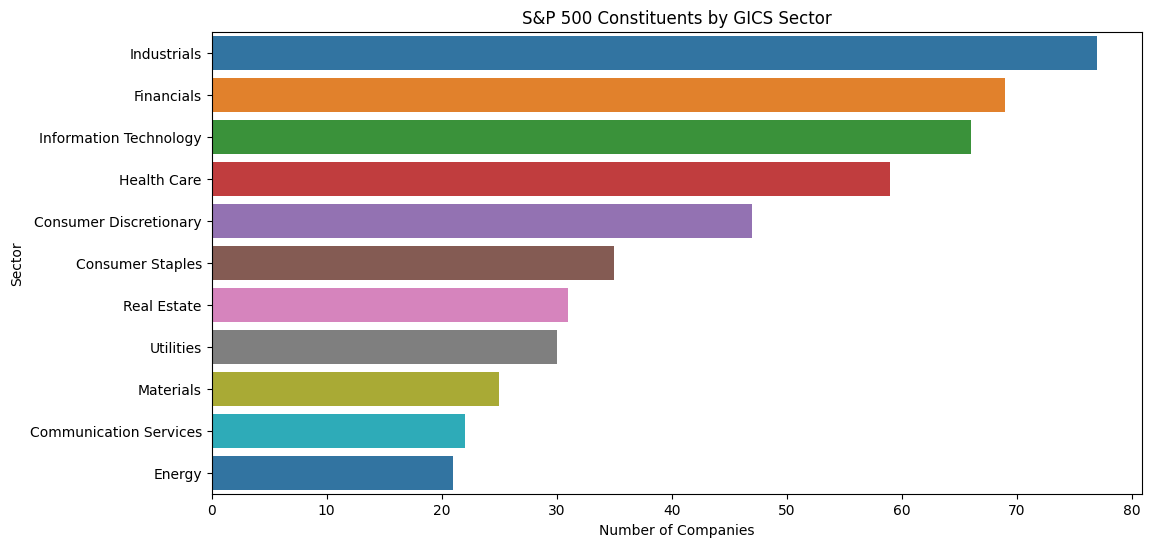

In [ ]:
# Run this after obtaining df_company
plt.figure(figsize=(12,6))
sector_counts = df_company['GICS Sector'].value_counts()

sns.barplot(
    x=sector_counts.values,
    y=sector_counts.index,
    palette="tab10"
)

plt.title("S&P 500 Constituents by GICS Sector")
plt.xlabel("Number of Companies")
plt.ylabel("Sector")
plt.show()

### Company-Level Feature Engineering 
To understand which companies were the largest contributors to the S&P500 performance in 1H 2025, we derive two core financial metrics from daily prices and volume 
1. Cumulative Returns: This captures the total performance over the 6 month period, compounding daily returns
2. Volatility: Risk or mathematically the standard deviation of daily returns 

In [17]:
df_company = df_daily.groupby(['ticker','company_name','GICS Sector','GICS Sub-Industry']).agg(
    cum_return = ('daily_returns', lambda x: (1+x).prod() -1),
    volatility = ('daily_returns', 'std'),
    avg_dollar_volume = ('dollar_volume', 'mean'),
    avg_daily_returns = ('daily_returns', 'mean')
).reset_index()

df_company.head()

,ticker,company_name,GICS Sector,GICS Sub-Industry,cum_return,volatility,avg_dollar_volume,avg_daily_returns
0,A,Agilent Technologies,Health Care,Life Sciences Tools & Services,-0.128289,0.018241,2.501714e+08,-0.000961
1,AAPL,Apple Inc.,Information Technology,"Technology Hardware, Storage & Peripherals",0.140034,0.022368,1.241435e+10,0.001315
2,ABBV,AbbVie,Health Care,Biotechnology,0.063009,0.018589,1.345532e+09,0.000673
3,ABNB,Airbnb,Consumer Discretionary,"Hotels, Resorts & Cruise Lines",0.036393,0.023250,7.184059e+08,0.000554
4,ABT,Abbott Laboratories,Health Care,Health Care Equipment,0.339452,0.014564,8.872299e+08,0.002503


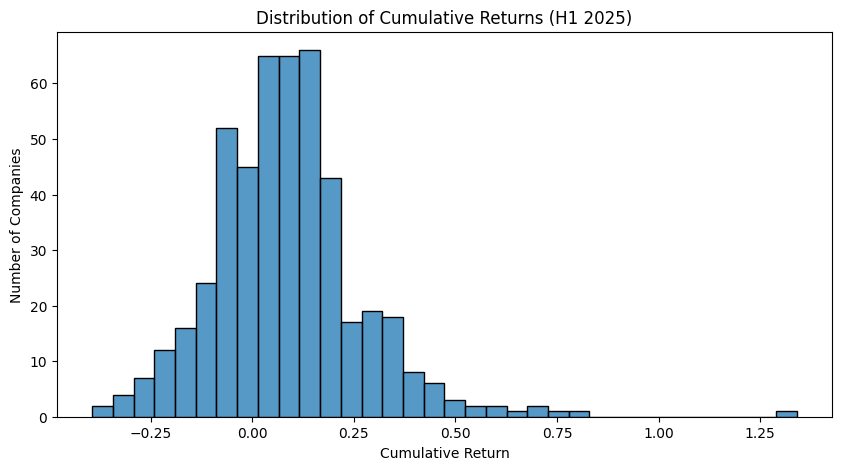

In [18]:
# Distribution of company returns 
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.histplot(df_company['cum_return'])
plt.title('Distribution of Cumulative Returns (H1 2025)')
plt.xlabel('Cumulative Return')
plt.ylabel('Number of Companies')
plt.show()

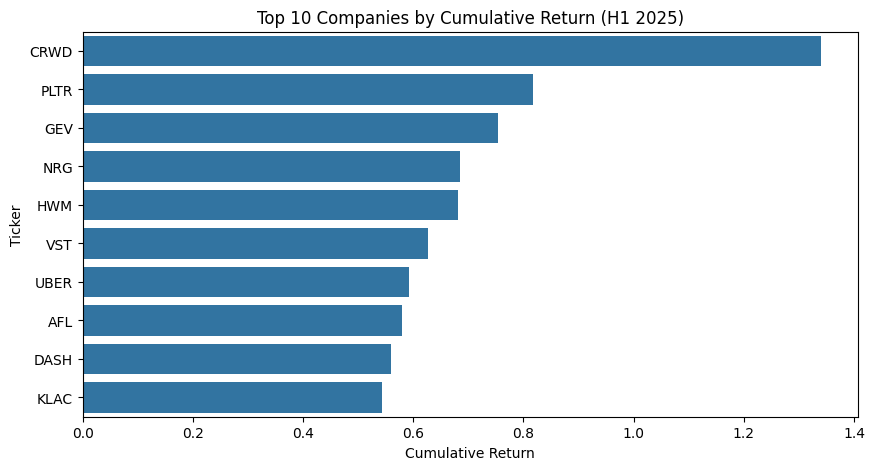

In [19]:
top10 = df_company.nlargest(10, 'cum_return')

plt.figure(figsize=(10,5))
sns.barplot(data=top10, x='cum_return', y='ticker')
plt.title('Top 10 Companies by Cumulative Return (H1 2025)')
plt.xlabel('Cumulative Return')
plt.ylabel('Ticker')
plt.show()

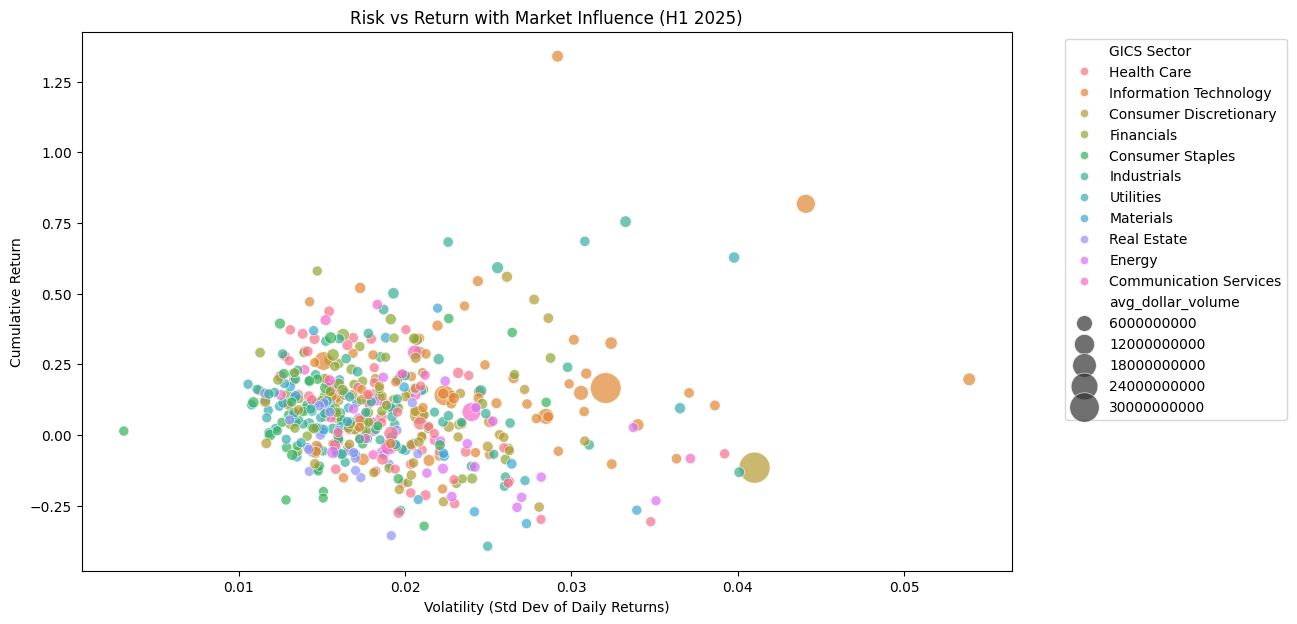

In [20]:
plt.figure(figsize=(12,7))
sns.scatterplot(
    data=df_company,
    x='volatility',
    y='cum_return',
    size='avg_dollar_volume',
    hue='GICS Sector',
    alpha=0.7,
    sizes=(50, 500)
)
plt.title('Risk vs Return with Market Influence (H1 2025)')
plt.xlabel('Volatility (Std Dev of Daily Returns)')
plt.ylabel('Cumulative Return')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


#### From this risk return chart, we can tell that 
1. Higher Returns generally require higher volatility
2. Larger Bubbles appear top performers, especially tech firms 

#### We further calculate weighted contribution as a proxy for the S&P500 impact as it allows us to measure which stocks drove the S&P500 index 

In [ ]:
df_company['weighted_contributions'] = df_company['cum_return'] * df_company['avg_dollar_volume']

# Obtain the top 20 
top_contributors = df_company.nlargest(20,'weighted_contributions')
top_contributors

,ticker,company_name,GICS Sector,GICS Sub-Industry,cum_return,volatility,avg_dollar_volume,avg_daily_returns,weighted_contributions
356,PLTR,Palantir Technologies,Information Technology,Application Software,0.817542,0.044097,1.016988e+10,0.005857,8.314305e+09
329,NVDA,Nvidia,Information Technology,Semiconductors,0.165752,0.032066,3.272141e+10,0.001763,5.423629e+09
309,MSFT,Microsoft,Information Technology,Systems Software,0.261385,0.015103,9.689858e+09,0.002016,2.532780e+09
107,CRWD,CrowdStrike,Information Technology,Systems Software,1.339502,0.029173,1.607033e+09,0.007400,2.152623e+09
1,AAPL,Apple Inc.,Information Technology,"Technology Hardware, Storage & Peripherals",0.140034,0.022368,1.241435e+10,0.001315,1.738432e+09
320,NFLX,Netflix,Communication Services,Movies & Entertainment,0.292147,0.020594,4.405610e+09,0.002312,1.287086e+09
437,UBER,Uber,Industrials,Passenger Ground Transportation,0.591536,0.025569,1.792859e+09,0.004135,1.060541e+09
193,GEV,GE Vernova,Industrials,Heavy Electrical Equipment,0.754418,0.033259,1.403537e+09,0.005155,1.058854e+09
250,JPM,JPMorgan Chase,Financials,Diversified Banks,0.353867,0.016282,2.592923e+09,0.002615,9.175504e+08
293,META,Meta Platforms,Communication Services,Interactive Media & Services,0.081132,0.024000,1.010544e+10,0.000918,8.198715e+08


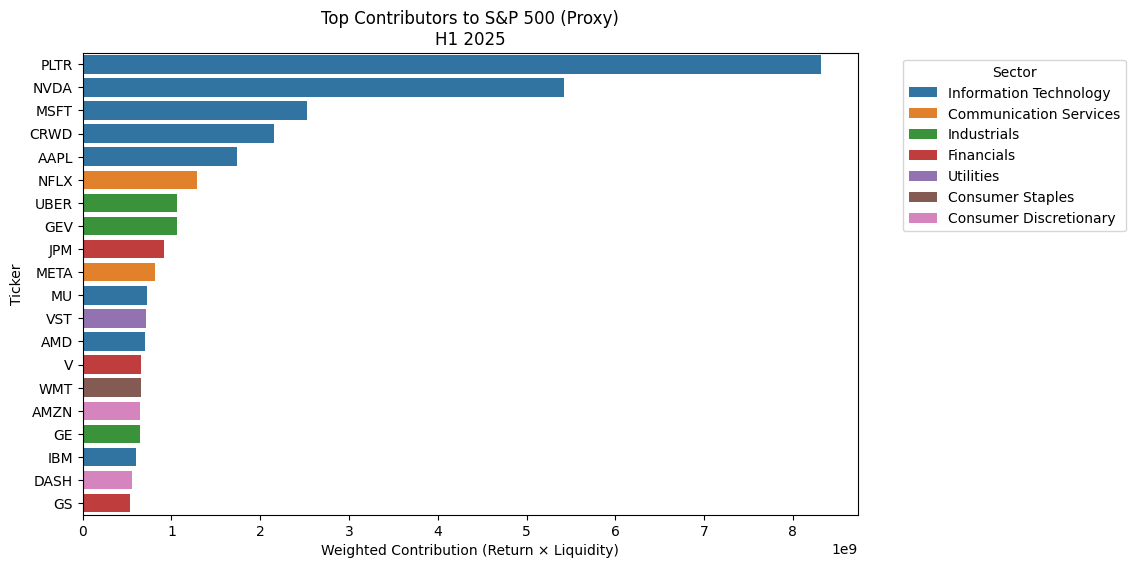

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.barplot(data=top_contributors, 
            x='weighted_contributions', 
            y='ticker', 
            hue='GICS Sector',
            dodge=False)
plt.title('Top Contributors to S&P 500 (Proxy)\nH1 2025')
plt.xlabel('Weighted Contribution (Return × Liquidity)')
plt.ylabel('Ticker')
plt.legend(title='Sector', bbox_to_anchor=(1.05,1))
plt.show()

#### Intrestingly, most of the companies emerging in the contribution ranking belong to the information technology sector which prompts the question: 
**Is Sector Membership a key factor behind performance, or are other financial characteristics more important?**


### Linear Regression Model
#### To evaluate this, we build a linear regression model using cumulative returns as the target variable, and risk, average dollar volume, sector as our features. 
#### This allows us to quantify how much sector effects, risk-taking, and market participation explained company performance, which ultimately flowed into S&P 500 index gains.

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

target = 'cum_return'
features = ['volatility','avg_dollar_volume','GICS Sector']

X = df_company[features]
y = df_company[target]

# Split the features to categorical and numeric features
numeric_features = ['volatility','avg_dollar_volume']
categorical_features = ['GICS Sector']

# Scale the numeric features and conduct one hot encoding on the categories 
preprocessor = ColumnTransformer(
    transformers =[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop = 'first'), categorical_features)
    ]
)

model = Pipeline(steps=[('preprocessor',preprocessor),
                        ('regressor', LinearRegression())])

X_train, X_test, y_train, y_test = train_test_split( X, y,
    test_size=0.4,      # 30% test 
    random_state=42,    # reproducible split
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("R² score:", r2)
print("RMSE:", rmse)


R² score: -0.13081278998922197
RMSE: 0.18432394432633667


### Insights to Results:
1. With a negative R^2 value, this indicates that the model's performed worse than the baseline, reflecting the significant noise inherent in short term stock returns 
2. With a RMSE score of 0.184, this tells us that on average the models prediction points are off by ~18 percentage points relative to the 6 month cumulative returns observed. Furthermore, 18% is quite large and hence confirms the return unpredictability 
#### Hence, the linear regression model showed that volatility, liquidity and sector membership only explain a very small portion of the variation in cumulative returns. Furthermore, the negative R Square value suggests that predicting the average returns for all companies would have been more accurate.
-------------------------------------------------------------------------------------------------
### Reasons for poor performance: 
Short term equity returns are 
- Highly Noisy
- Influenced by other events that are not capturable (AI, Global Events and also Trump...)
- Not fully explainable by just 3 features

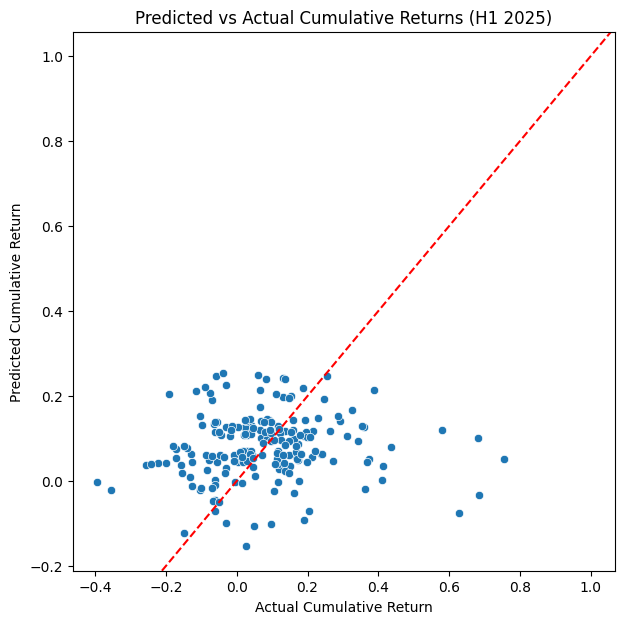

In [24]:
plt.figure(figsize=(7,7))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Cumulative Return")
plt.ylabel("Predicted Cumulative Return")
plt.title("Predicted vs Actual Cumulative Returns (H1 2025)")
plt.axline((0, 0), (1, 1), color='red', linestyle='--')  # Perfect Prediction line (Mean)
plt.show()

In [25]:
# Get names of encoded sector features
encoder = model.named_steps['preprocessor'].named_transformers_['cat']
sector_feature_names = encoder.get_feature_names_out(['GICS Sector'])

# Final feature names in regression:
feature_names = numeric_features + list(sector_feature_names)

# Coefficients from the linear regression
coeffs = model.named_steps['regressor'].coef_

coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coeffs
}).sort_values(by='Coefficient', ascending=False)

coef_df

,Feature,Coefficient
8,GICS Sector_Information Technology,0.102219
1,avg_dollar_volume,0.017099
7,GICS Sector_Industrials,-0.001683
5,GICS Sector_Financials,-0.024030
0,volatility,-0.031676
2,GICS Sector_Consumer Discretionary,-0.037452
6,GICS Sector_Health Care,-0.061375
11,GICS Sector_Utilities,-0.091103
3,GICS Sector_Consumer Staples,-0.099768
9,GICS Sector_Materials,-0.100562


### Sector Level Analysis

In [27]:
sector_stats = df_company.groupby("GICS Sector").agg({
    "cum_return": "mean",
    "volatility": "mean",
    "weighted_contributions": "sum"
}).sort_values(by="weighted_contributions", ascending=False)

sector_stats

,cum_return,volatility,weighted_contributions
GICS Sector,,,
Information Technology,0.161963,0.023882,2.686087e+10
Financials,0.119308,0.017633,5.767181e+09
Industrials,0.110361,0.018636,5.525320e+09
Communication Services,0.114988,0.018973,3.197741e+09
Health Care,0.063467,0.019333,2.531779e+09
Consumer Staples,0.047079,0.015613,1.889618e+09
Utilities,0.090185,0.016740,1.399341e+09
Materials,0.033347,0.019280,4.312772e+08
Real Estate,-0.004257,0.016530,1.728501e+08


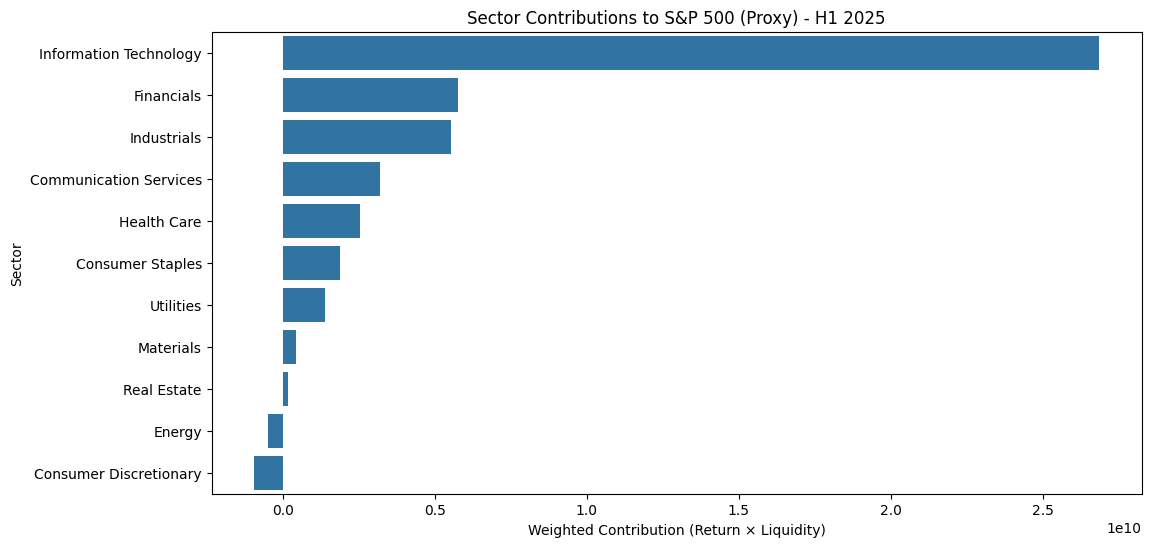

In [28]:
plt.figure(figsize=(12,6))
sns.barplot(data=sector_stats.sort_values('weighted_contributions',ascending=False),
            x='weighted_contributions', y=sector_stats.index)
plt.title("Sector Contributions to S&P 500 (Proxy) - H1 2025")
plt.xlabel("Weighted Contribution (Return × Liquidity)")
plt.ylabel("Sector")
plt.show()

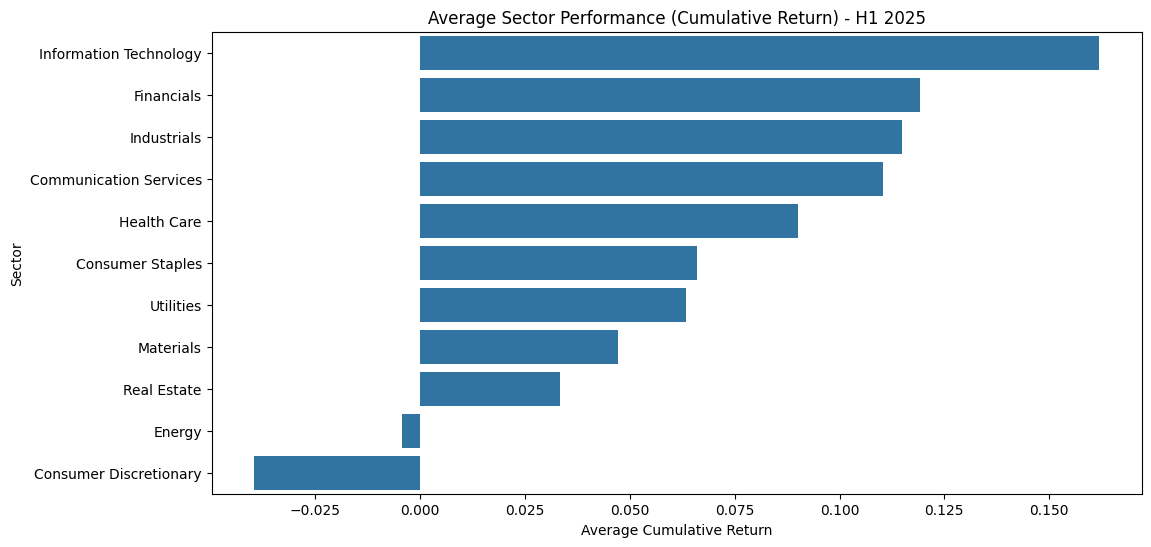

In [29]:
plt.figure(figsize=(12,6))
sns.barplot(data=sector_stats.sort_values('cum_return',ascending=False),
            x='cum_return', y=sector_stats.index)
plt.title("Average Sector Performance (Cumulative Return) - H1 2025")
plt.xlabel("Average Cumulative Return")
plt.ylabel("Sector")
plt.show()


### Insights to Sector-Level Analysis:
The sector level analysis reinforces our earlier findings where 
1. Information Technology Stocks were the primary drivers of index gains 
- Their impact was amplified by high liquidity and strong investor demands 
2. Other sectors contributed much less, with Energy and Consumer Discretionary contributing much less

## Summary
This project examined which companies and sectors contributed most to the S&P 500’s performance in the first half of 2025, and what underlying factors explained this leadership. Using daily pricing and volume data for 503 S&P 500 constituents, we engineered performance, risk, and liquidity metrics — including cumulative return, volatility, and dollar volume — and combined them into a weighted contribution measure to approximate market impact.

The analysis found that a small number of technology companies were responsible for a disproportionately large share of index gains. Palantir (PLTR), Nvidia (NVDA), Microsoft (MSFT), and Apple (AAPL) topped the list, driven by high returns amplified by strong market participation. At a sector level, Information Technology exhibited the highest average returns and the strongest total contribution, confirming that AI and digital transformation capital flows were the defining forces in H1 2025 equity markets.

A linear regression was then used to explore performance drivers. While volatility (risk), liquidity, and sector membership showed a positive directional relationship with returns, the model exhibited low explanatory power (R² = –0.13). This reflects the well-documented reality that short-horizon stock returns are heavily influenced by idiosyncratic news, sentiment, and innovation shocks, which are not captured by standard market microstructure variables.

Overall, the results suggest that the market rally during this period was tech-led, momentum-driven, and highly concentrated, with index performance hinging on a narrow set of high-growth names benefiting from secular investment themes in AI, cloud computing, and data infrastructure.

---------------------------------------------------
## Conclusion
While traditional factors like risk and liquidity contributed partially, the largest market movers gained from company-specific innovation cycles and investor momentum, underscoring that outperformance was not broad-based across sectors, but rather concentrated in stocks directly tied to emerging AI value creation.